### Purpose
* To keep track of the types of model architectures used to predict classes of proteins
* The models are as follows:
    1. Using two extra convolutional layers, compared with the just the one covolutional layer in the first model
    2. Using and LSTM after an embedding layer
    3. Using a GRU after an ebedding layer
    4. Using a bi-directional layer after an embedding layer
* For each model we show loss and accuracy curves for both train and test
* Confusion matrices and raw counts for the predictions
* Model summaries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import os

In [9]:
training_files = [f for f in os.listdir() if '.csv' in f]
training_files
model_names = ['3_Conv_Layers','GRU','LSTM','Bi-directional_LSTM']

### Training Loss Curves

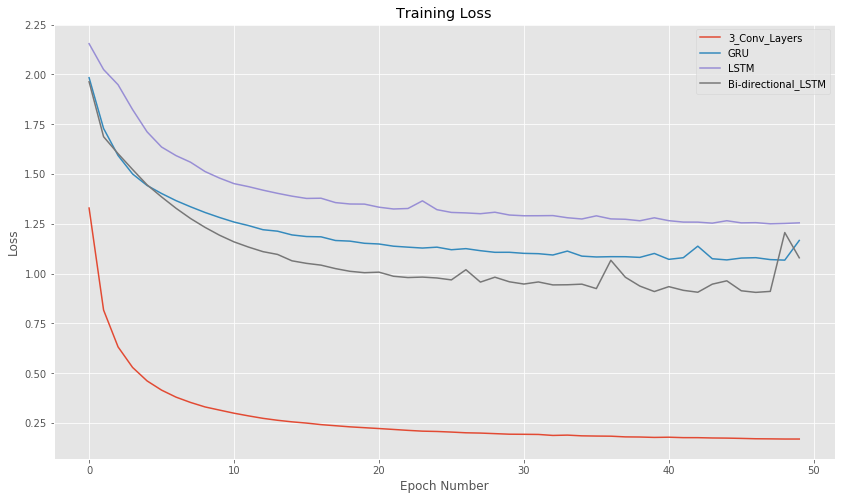

In [21]:
plt.figure(figsize=(14,8))
for a,b in zip(training_files,model_names):
    #load in frame
    frame = pd.read_csv(a)
    #pull metric
    to_plot = frame['loss']
    plt.plot(to_plot,label=b)
    plt.legend()
    plt.title('Training Loss')
    plt.xlabel('Epoch Number')
    plt.ylabel('Loss')
plt.show()
    

### Training Accuracy Curves

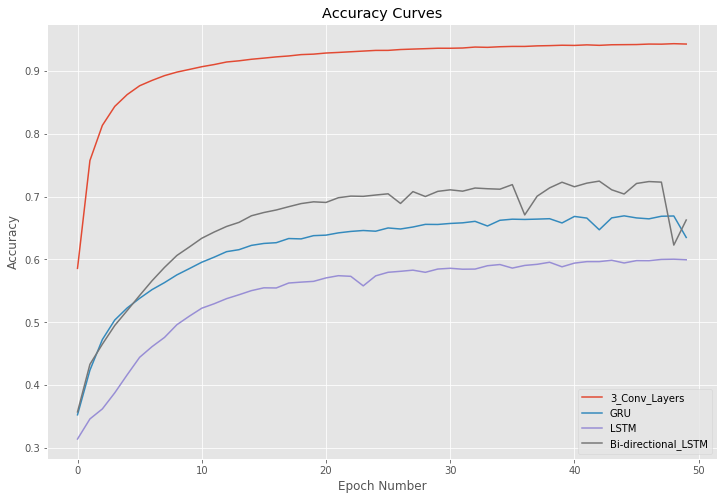

In [35]:
plt.figure(figsize=(12,8))
for a,b in zip(training_files,model_names):
    #load in frame
    frame = pd.read_csv(a)
    #pull metric
    to_plot = frame.iloc[:,4]
    plt.plot(to_plot,label=b)
    plt.legend()
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch Number')
    plt.ylabel('Accuracy')
plt.show()

### Validation Loss Curves

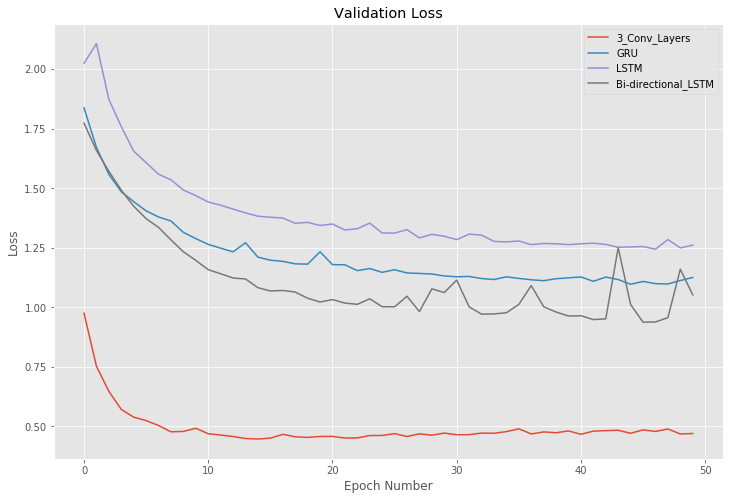

In [40]:
plt.figure(figsize=(12,8))
for a,b in zip(training_files,model_names):
    #load in frame
    frame = pd.read_csv(a)
    #pull metric
    to_plot = frame.iloc[:,1]
    plt.plot(to_plot,label=b)
    plt.legend()
    plt.title('Validation Loss')
    plt.xlabel('Epoch Number')
    plt.ylabel('Loss')
plt.show()

### Validation Accuracy Curves

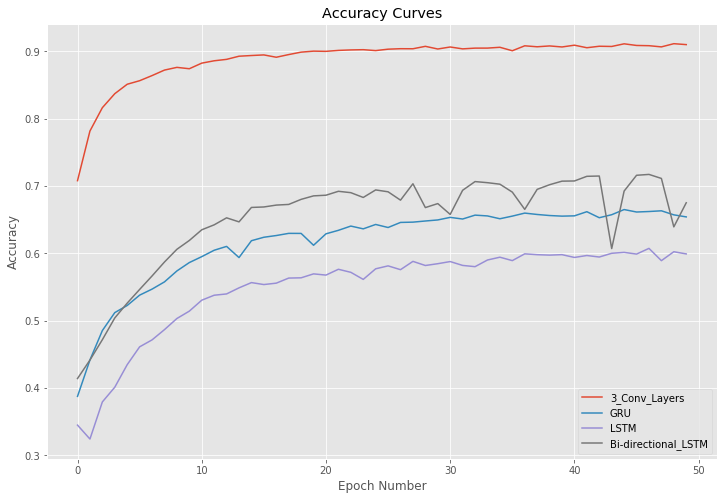

In [38]:
plt.figure(figsize=(12,8))
for a,b in zip(training_files,model_names):
    #load in frame
    frame = pd.read_csv(a)
    #pull metric
    to_plot = frame.iloc[:,2]
    plt.plot(to_plot,label=b)
    plt.legend()
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch Number')
    plt.ylabel('Accuracy')
plt.show()

### Load in data to forward pass into all four models
* Note: Did not save validation and hold out sets
* So the following metrics will be used on the union of the two data sets

In [2]:
proteins = pd.read_csv('/Users/janmichaelaustria/Google Drive/UNH Spring/Protein_seq_project/top_15_proteins.csv')

In [3]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(proteins['classification'])

In [4]:
Y[46]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [5]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# maximum length of sequence, everything afterwards is discarded!
max_length = 512

#create and fit tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(proteins['sequence'])
#represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(proteins['sequence'])
X = sequence.pad_sequences(X, maxlen=max_length,padding='pre')

Using TensorFlow backend.


In [6]:
X.shape

(283101, 512)

### Model 1:
* Three conv layers

In [7]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import itertools

In [9]:
model = load_model("ThreeConvLayers.h5")

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 512, 16)           416       
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 512, 64)           8256      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 256, 64)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 256, 32)           8224      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 128, 32)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 128, 16)           1040      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 64, 16)            0         
__________

In [11]:
preds = model.predict(X)

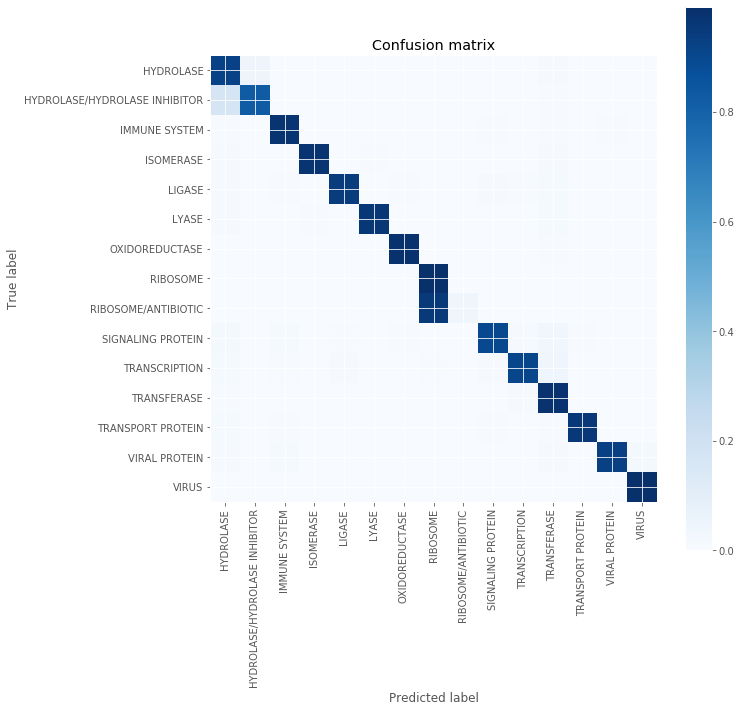

In [12]:
# Compute confusion matrix
cm = confusion_matrix(np.argmax(Y, axis=1), np.argmax(preds, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [67]:
print(classification_report(np.argmax(Y, axis=1), 
                            np.argmax(preds, axis=1), 
                            target_names=lb.classes_))

                               precision    recall  f1-score   support

                    HYDROLASE       0.94      0.92      0.93     47833
HYDROLASE/HYDROLASE INHIBITOR       0.79      0.82      0.81     11262
                IMMUNE SYSTEM       0.96      0.97      0.97     15989
                    ISOMERASE       0.97      0.97      0.97      6613
                       LIGASE       0.94      0.94      0.94      5119
                        LYASE       0.97      0.96      0.97     11871
               OXIDOREDUCTASE       0.99      0.98      0.98     35113
                     RIBOSOME       0.92      0.99      0.95     60710
          RIBOSOME/ANTIBIOTIC       0.71      0.04      0.08      5273
            SIGNALING PROTEIN       0.89      0.90      0.89      6568
                TRANSCRIPTION       0.94      0.90      0.92     10564
                  TRANSFERASE       0.95      0.98      0.96     37726
            TRANSPORT PROTEIN       0.97      0.96      0.96      8753
     

In [41]:
model1_accs = np.diag(cm)
model1_accs

array([0.92, 0.82, 0.97, 0.97, 0.94, 0.96, 0.98, 0.99, 0.04, 0.9 , 0.9 ,
       0.98, 0.96, 0.93, 0.99])

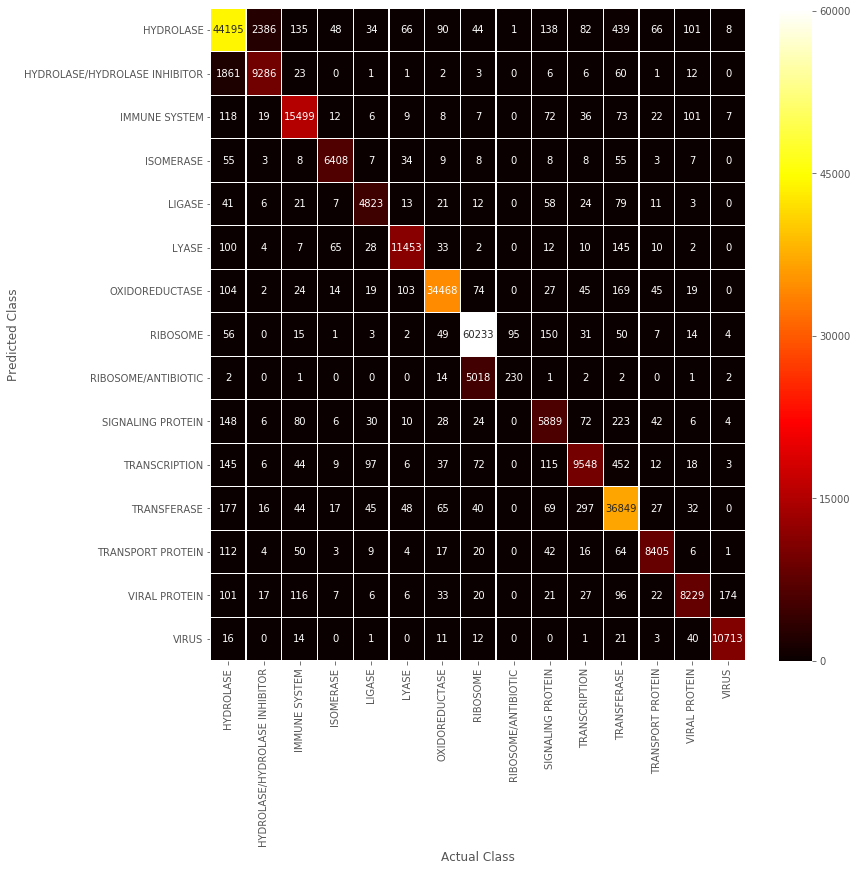

In [40]:
plt.figure(figsize=(12,12))
g = sns.heatmap(confusion_matrix(np.argmax(Y, axis=1), 
                             np.argmax(preds, axis=1)), annot=True,fmt='d',cmap="hot",
                xticklabels=lb.classes_,yticklabels=lb.classes_,
           linewidths=.3)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title("Counts of actual Class")
plt.show()

Note to myself:
* Use the embedding matrix to find similarities across a unique amino acid
* i.e create a similarity matrix aftewards

### Model 2:
* LSTM after embedding

In [43]:
model = load_model("EmbeddingLSTM.h5")

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 512, 16)           416       
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                2960      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
Total params: 3,691
Trainable params: 3,691
Non-trainable params: 0
_________________________________________________________________


In [45]:
preds = model.predict(X)

In [46]:
print("train-acc = " + str(accuracy_score(np.argmax(Y, axis=1), 
                                          np.argmax(preds, axis=1))))


train-acc = 0.6001956898774642


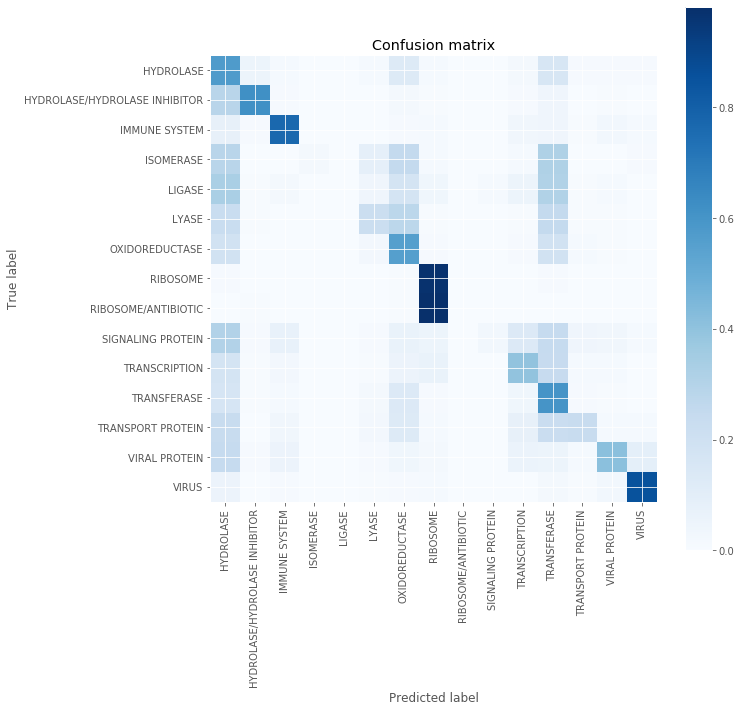

In [47]:
# Compute confusion matrix
cm = confusion_matrix(np.argmax(Y, axis=1), np.argmax(preds, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

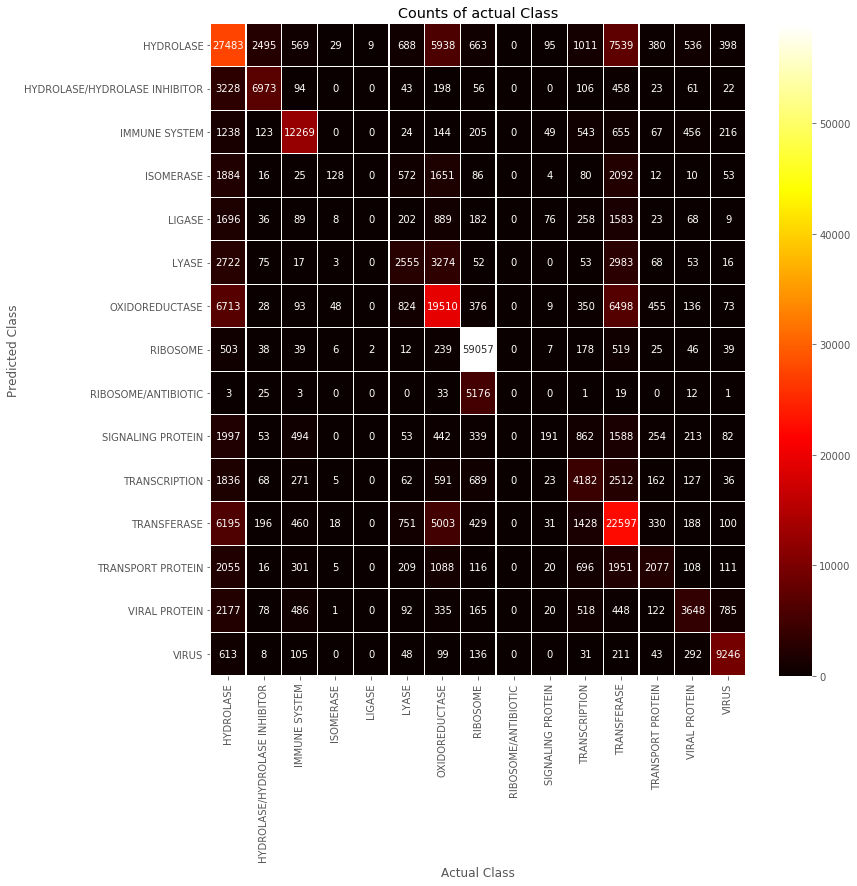

In [48]:
plt.figure(figsize=(12,12))
g = sns.heatmap(confusion_matrix(np.argmax(Y, axis=1), 
                             np.argmax(preds, axis=1)), annot=True,fmt='d',cmap="hot",
                xticklabels=lb.classes_,yticklabels=lb.classes_,
           linewidths=.3)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title("Counts of actual Class")
plt.show()

In [49]:
print(classification_report(np.argmax(Y, axis=1), 
                            np.argmax(preds, axis=1), 
                            target_names=lb.classes_))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                               precision    recall  f1-score   support

                    HYDROLASE       0.46      0.57      0.51     47833
HYDROLASE/HYDROLASE INHIBITOR       0.68      0.62      0.65     11262
                IMMUNE SYSTEM       0.80      0.77      0.78     15989
                    ISOMERASE       0.51      0.02      0.04      6613
                       LIGASE       0.00      0.00      0.00      5119
                        LYASE       0.42      0.22      0.28     11871
               OXIDOREDUCTASE       0.49      0.56      0.52     35113
                     RIBOSOME       0.87      0.97      0.92     60710
          RIBOSOME/ANTIBIOTIC       0.00      0.00      0.00      5273
            SIGNALING PROTEIN       0.36      0.03      0.05      6568
                TRANSCRIPTION       0.41      0.40      0.40     10564
                  TRANSFERASE       0.44      0.60      0.51     37726
            TRANSPORT PROTEIN       0.51      0.24      0.32      8753
     

In [50]:
model2_accs = np.diag(cm)
model1_accs
model2_accs

array([0.57, 0.62, 0.77, 0.02, 0.  , 0.22, 0.56, 0.97, 0.  , 0.03, 0.4 ,
       0.6 , 0.24, 0.41, 0.85])

Not too good

### Model 3
* GRU after embedding layer

In [51]:
model = load_model('EmbeddingGRU.h5',compile=False)

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 512, 16)           416       
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                4704      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                495       
Total params: 5,615
Trainable params: 5,615
Non-trainable params: 0
_________________________________________________________________


In [53]:
preds = model.predict(X)

In [54]:
print("train-acc = " + str(accuracy_score(np.argmax(Y, axis=1), 
                                          np.argmax(preds, axis=1))))

train-acc = 0.6613611396639362


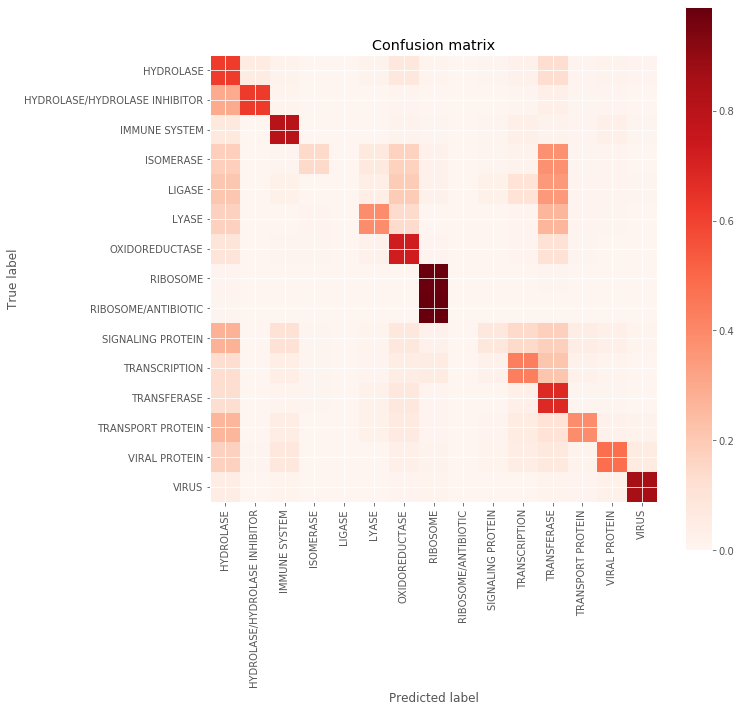

In [55]:
# Compute confusion matrix
cm = confusion_matrix(np.argmax(Y, axis=1), np.argmax(preds, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Reds)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

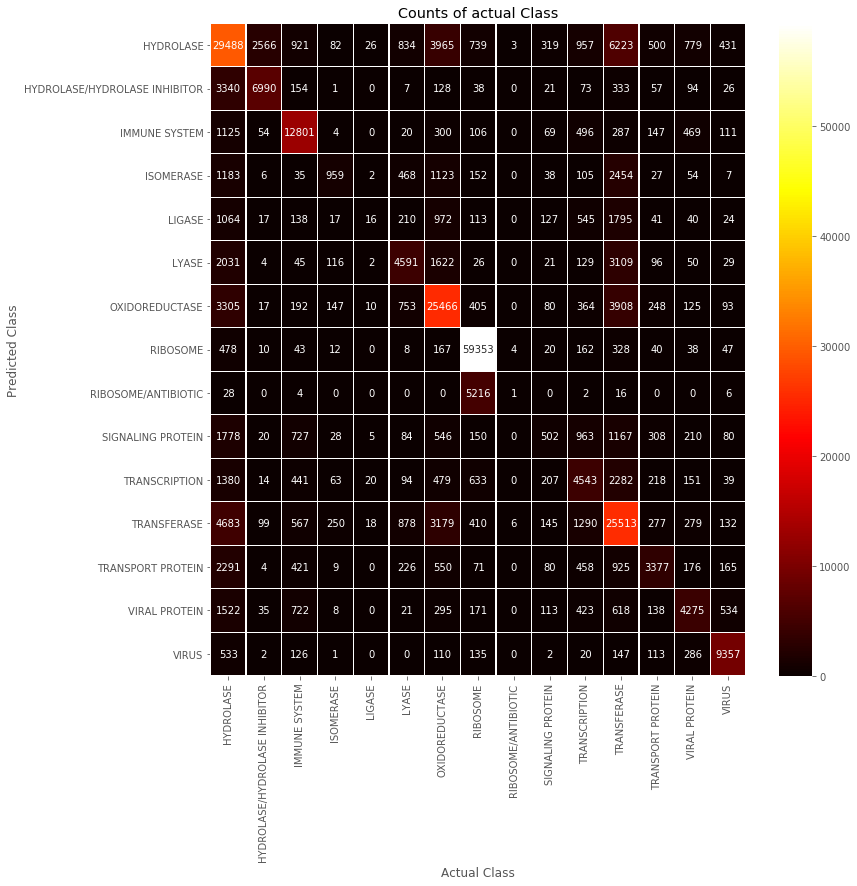

In [56]:
plt.figure(figsize=(12,12))
g = sns.heatmap(confusion_matrix(np.argmax(Y, axis=1), 
                             np.argmax(preds, axis=1)), annot=True,fmt='d',cmap="hot",
                xticklabels=lb.classes_,yticklabels=lb.classes_,
           linewidths=.3)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title("Counts of actual Class")
plt.show()

In [57]:
print(classification_report(np.argmax(Y, axis=1), 
                            np.argmax(preds, axis=1), 
                            target_names=lb.classes_))

                               precision    recall  f1-score   support

                    HYDROLASE       0.54      0.62      0.58     47833
HYDROLASE/HYDROLASE INHIBITOR       0.71      0.62      0.66     11262
                IMMUNE SYSTEM       0.74      0.80      0.77     15989
                    ISOMERASE       0.57      0.15      0.23      6613
                       LIGASE       0.16      0.00      0.01      5119
                        LYASE       0.56      0.39      0.46     11871
               OXIDOREDUCTASE       0.65      0.73      0.69     35113
                     RIBOSOME       0.88      0.98      0.92     60710
          RIBOSOME/ANTIBIOTIC       0.07      0.00      0.00      5273
            SIGNALING PROTEIN       0.29      0.08      0.12      6568
                TRANSCRIPTION       0.43      0.43      0.43     10564
                  TRANSFERASE       0.52      0.68      0.59     37726
            TRANSPORT PROTEIN       0.60      0.39      0.47      8753
     

In [59]:
model3_accs = np.diag(cm)
model3_accs

array([6.16e-01, 6.21e-01, 8.01e-01, 1.45e-01, 3.13e-03, 3.87e-01,
       7.25e-01, 9.78e-01, 1.90e-04, 7.64e-02, 4.30e-01, 6.76e-01,
       3.86e-01, 4.82e-01, 8.64e-01])

Not as good as the model with three conv layers, but better  than an LSTM

### Model 4
* Embedding followed by bi-directional LSTM

In [60]:
model = load_model("EmbeddingBiDirLSTM.h5", compile=False)

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 512, 16)           416       
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 64)                9408      
_________________________________________________________________
dense_10 (Dense)             (None, 15)                975       
Total params: 10,799
Trainable params: 10,799
Non-trainable params: 0
_________________________________________________________________


In [62]:
preds = model.predict(X)

In [63]:
print("train-test-acc = " + str(accuracy_score(np.argmax(Y, axis=1), 
                                          np.argmax(preds, axis=1))))

train-test-acc = 0.6868149529673155


In [64]:
print(classification_report(np.argmax(Y, axis=1), 
                            np.argmax(preds, axis=1), 
                            target_names=lb.classes_))

                               precision    recall  f1-score   support

                    HYDROLASE       0.59      0.69      0.64     47833
HYDROLASE/HYDROLASE INHIBITOR       0.76      0.59      0.67     11262
                IMMUNE SYSTEM       0.76      0.82      0.79     15989
                    ISOMERASE       0.54      0.22      0.32      6613
                       LIGASE       0.48      0.13      0.20      5119
                        LYASE       0.58      0.41      0.48     11871
               OXIDOREDUCTASE       0.67      0.75      0.71     35113
                     RIBOSOME       0.89      0.97      0.93     60710
          RIBOSOME/ANTIBIOTIC       0.00      0.00      0.00      5273
            SIGNALING PROTEIN       0.31      0.11      0.16      6568
                TRANSCRIPTION       0.46      0.56      0.51     10564
                  TRANSFERASE       0.55      0.65      0.60     37726
            TRANSPORT PROTEIN       0.67      0.44      0.53      8753
     

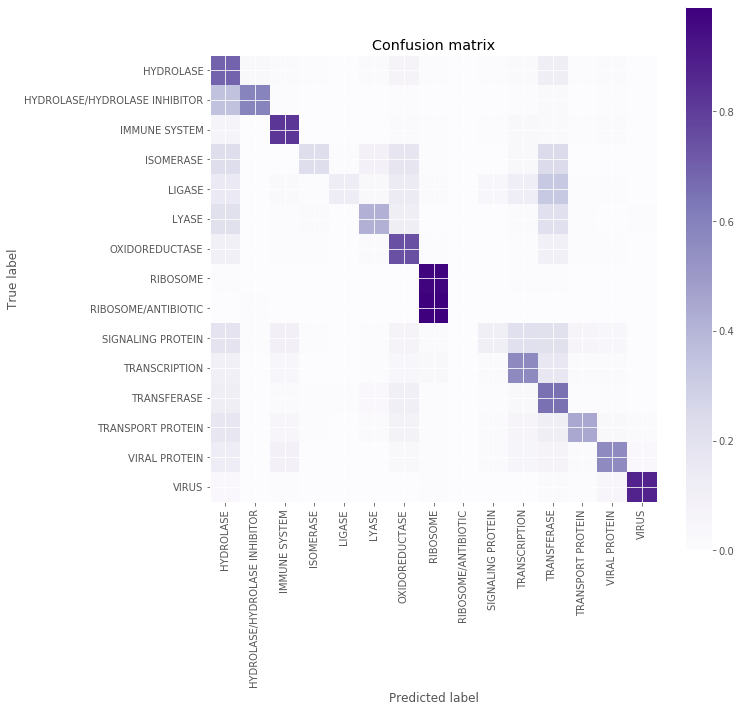

In [65]:
# Compute confusion matrix
cm = confusion_matrix(np.argmax(Y, axis=1), np.argmax(preds, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Purples)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

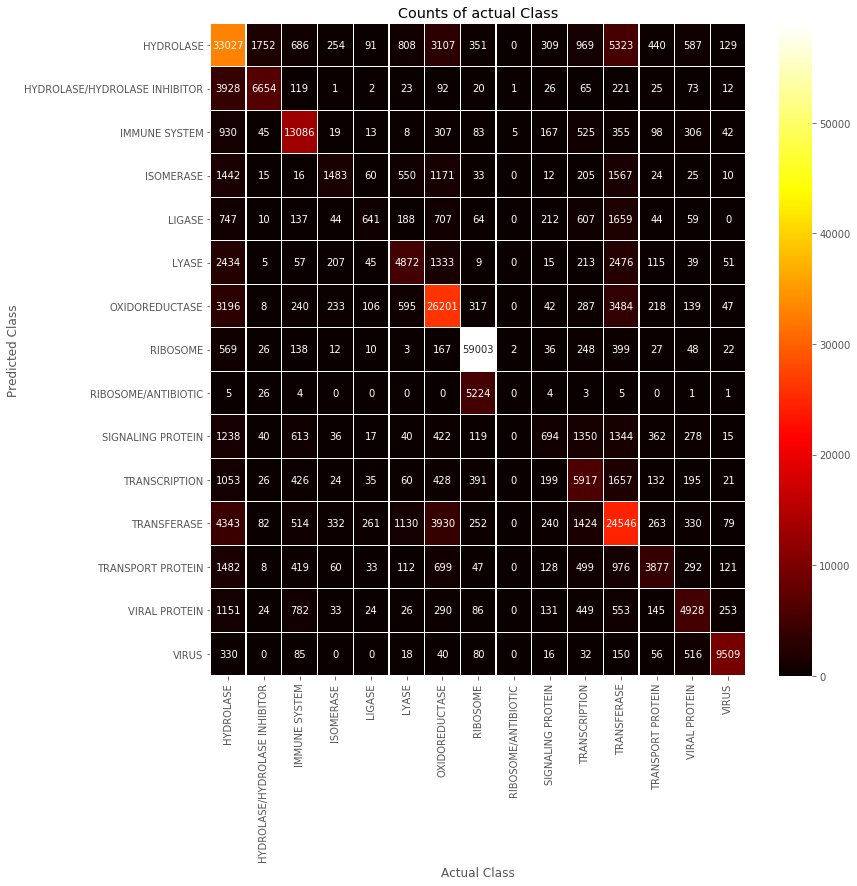

In [66]:
plt.figure(figsize=(12,12))
g = sns.heatmap(confusion_matrix(np.argmax(Y, axis=1), 
                             np.argmax(preds, axis=1)), annot=True,fmt='d',cmap="hot",
                xticklabels=lb.classes_,yticklabels=lb.classes_,
           linewidths=.3)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.title("Counts of actual Class")
plt.show()

### Final Notes:
* A multi conv layer did better than any of the other sequential models at predicting the class of proteins
* Does this imply that predicting protein classes is based more on the content of amino acids than there actual sequence.
* The models seems to suggest  so
* In another notebook, take a look at the emedding matrices and compare them against another for each of the different models


In [68]:
model4_accs = np.diag(cm)

In [71]:
allaccs = pd.DataFrame()
allaccs['Protein_Classes']  = lb.classes_
allaccs['Model_1_Acc'] = model1_accs
allaccs['Model_2_Acc'] = model2_accs
allaccs['Model_3_Acc'] = model3_accs
allaccs['Model_4_Acc'] = model4_accs

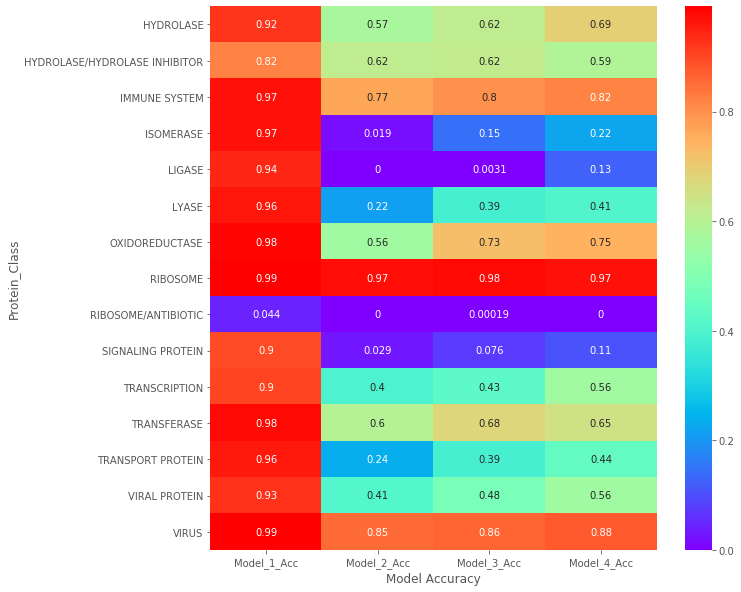

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(allaccs.iloc[:,1:],annot=True,yticklabels=lb.classes_,cmap='rainbow')
plt.ylabel("Protein_Class")
plt.xlabel("Model Accuracy")
plt.show()